In [3]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

train = pd.read_csv('./big-data-analytics-certification-kr-2022/train.csv')
test = pd.read_csv('./big-data-analytics-certification-kr-2022/test.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3


In [4]:
train.info() # Null 값은 없네

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


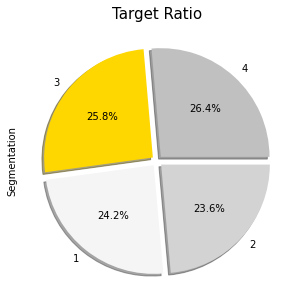

In [19]:
import matplotlib.pyplot as plt

explode = [0.05, 0.05, 0.05, 0.05]
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']

plt.subplots(figsize = (5,5))
train['Segmentation'].value_counts(normalize = True).plot(kind = 'pie', 
                                                          autopct = '%.1f%%',
                                                         colors = colors,
                                                         shadow = True,
                                                         explode = explode)

plt.title('Target Ratio', fontsize = 15)
plt.show()

- Target Ratio가 생각보다 균일하네

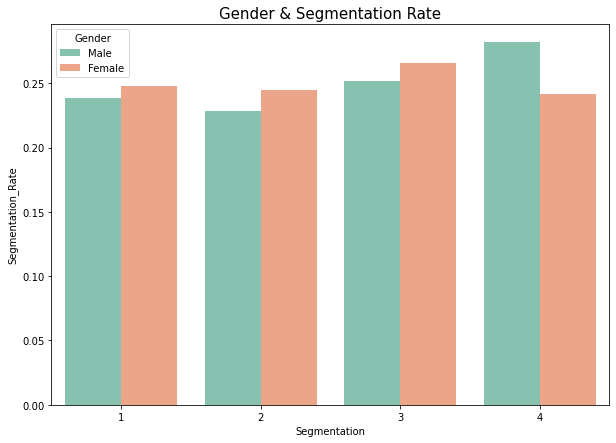

In [121]:
import seaborn as sns
sns.set_palette('Set2')

temp = train.groupby(['Gender'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Rate'}).reset_index()

plt.subplots(figsize = (10,7))
sns.barplot(x = temp['Segmentation'], 
            y = temp['Segmentation_Rate'], 
            hue = temp['Gender'],
            hue_order = ['Male','Female'],
            alpha = 0.85)

plt.title('Gender & Segmentation Rate', fontsize = 15)
plt.show()

- Segmentation의 4값을 보면 다른 값들과 다르게 남성비율이 높다.
- 아마도 Segmentation 4를 가르는 어느정도 괜찮은 변수가 되지않을까? 

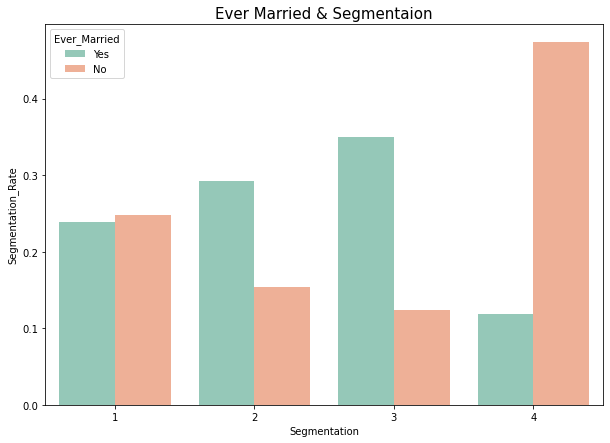

In [123]:
temp = train.groupby(['Ever_Married'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Rate'
}).reset_index()

plt.subplots(figsize = (10,7))
sns.barplot(x = temp['Segmentation'], 
            y = temp['Segmentation_Rate'], 
            hue = temp['Ever_Married'],
            hue_order = ['Yes', 'No'],
            alpha = 0.75)

plt.title('Ever Married & Segmentaion', fontsize = 15)
plt.show()

- Ever Married 역시 유무에 따라 Segmentation이 갈리는데 Segmentation 4는 잘 분류하겠다.
- 근데 1같은 경우는 Ever Married로 분류하기에는 어려울 듯

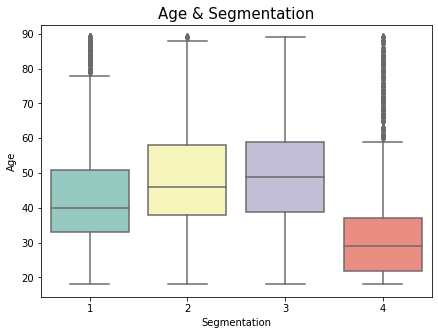

In [129]:
plt.subplots(figsize = (7,5))
sns.boxplot(x = train['Segmentation'], 
            y = train['Age'],
            palette = 'Set3')

plt.title('Age & Segmentation', fontsize = 15)
plt.show()

- 역시 Segmentation 4는 다른 클래스들의 비해 차이가 많이 난다.
- Age에서 각 클래스별로 어느정도 차이를 보이고 있다/

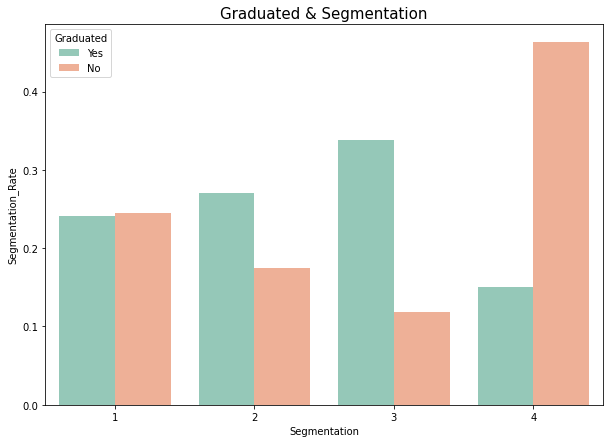

In [144]:
temp = train.groupby(['Graduated'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Rate'}).reset_index()

plt.subplots(figsize = (10,7))
sns.barplot(x = temp['Segmentation'],
            y = temp['Segmentation_Rate'],
            hue = temp['Graduated'],
            hue_order = ['Yes', 'No'],
            alpha = 0.75)

plt.title('Graduated & Segmentation', fontsize = 15)
plt.show()